In [1]:
using Oceananigans
using Printf

In [2]:
N = 256
grid = RectilinearGrid(
    GPU(),
    size = (N, N, N),
    x = (0, N * π / 32),
    y = (0, N * π / 32),
    z = (0, N * π / 32),
    topology = (Periodic, Periodic, Periodic))

mrgrid = MultiRegionGrid(grid, partition = XPartition(2), devices = 2)

┌ Warning: MultiRegion functionalities are experimental: help the development by reporting bugs or non-implemented features!
└ @ Oceananigans.MultiRegion /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/MultiRegion/multi_region_grid.jl:106


MultiRegionGrid{Float64, Periodic, Periodic, Periodic} partitioned on GPU{CUDA.CUDAKernels.CUDABackend}(CUDA.CUDAKernels.CUDABackend(false, true)): 
├── grids: 128×256×256 RectilinearGrid{Float64, Oceananigans.Grids.FullyConnected, Periodic, Periodic} on CUDAGPU with 3×3×3 halo 
├── partitioning: Equal partitioning in X with (2 regions) 
├── connectivity: MultiRegionObject{Tuple{@NamedTuple{west::Oceananigans.MultiRegion.RegionalConnectivity{Oceananigans.MultiRegion.West, Oceananigans.MultiRegion.East}, east::Oceananigans.MultiRegion.RegionalConnectivity{Oceananigans.MultiRegion.East, Oceananigans.MultiRegion.West}, north::Nothing, south::Nothing}, @NamedTuple{west::Oceananigans.MultiRegion.RegionalConnectivity{Oceananigans.MultiRegion.West, Oceananigans.MultiRegion.East}, east::Oceananigans.MultiRegion.RegionalConnectivity{Oceananigans.MultiRegion.East, Oceananigans.MultiRegion.West}, north::Nothing, south::Nothing}}, Tuple{CUDA.CuDevice, CUDA.CuDevice}} 
└── devices: (CUDA.CuDevice(0

In [ ]:
model = NonhydrostaticModel(; grid = mrgrid, advection = WENO())

e(x, y, z) = 2rand() - 1
set!(model, u = e, v = e, w = e)

simulation = Simulation(model; Δt = 0.01, stop_iteration = 100)

progress_message(sim) =
    @printf("Iteration: %04d, time: %s, Δt: %s, max(|w|) = %.1e ms⁻¹, wall time: %s\n",
        iteration(sim), prettytime(sim), prettytime(sim.Δt),
        maximum(abs, sim.model.velocities.w), prettytime(sim.run_wall_time))

add_callback!(simulation, progress_message, IterationInterval(20))

ErrorException: None of the implemented pressure solvers for NonhydrostaticModel are supported on MultiRegionGrid{Float64, Periodic, Periodic, Periodic} with Equal partitioning in X with (2 regions) on RectilinearGrid.

In [4]:
run!(simulation)

┌ Info: Initializing simulation...
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/run.jl:205


Iteration: 0000, time: 0 seconds, Δt: 10 ms, max(|w|) = 1.9e+00 ms⁻¹, wall time: 0 seconds


┌ Info:     ... simulation initialization complete (7.993 seconds)
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/run.jl:248
┌ Info: Executing initial time step...
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/run.jl:139
┌ Info:     ... initial time step complete (2.627 seconds).
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/run.jl:168


Iteration: 0020, time: 200.000 ms, Δt: 10 ms, max(|w|) = 1.0e+00 ms⁻¹, wall time: 11.416 seconds
Iteration: 0040, time: 400.000 ms, Δt: 10 ms, max(|w|) = 8.9e-01 ms⁻¹, wall time: 12.507 seconds
Iteration: 0060, time: 600.000 ms, Δt: 10 ms, max(|w|) = 7.5e-01 ms⁻¹, wall time: 13.603 seconds
Iteration: 0080, time: 800.000 ms, Δt: 10 ms, max(|w|) = 6.6e-01 ms⁻¹, wall time: 14.700 seconds


┌ Info: Simulation is stopping after running for 15.799 seconds.
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/simulation.jl:199
┌ Info: Model iteration 100 equals or exceeds stop iteration 100.
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/simulation.jl:200


Iteration: 0100, time: 1000.000 ms, Δt: 10 ms, max(|w|) = 6.1e-01 ms⁻¹, wall time: 15.799 seconds


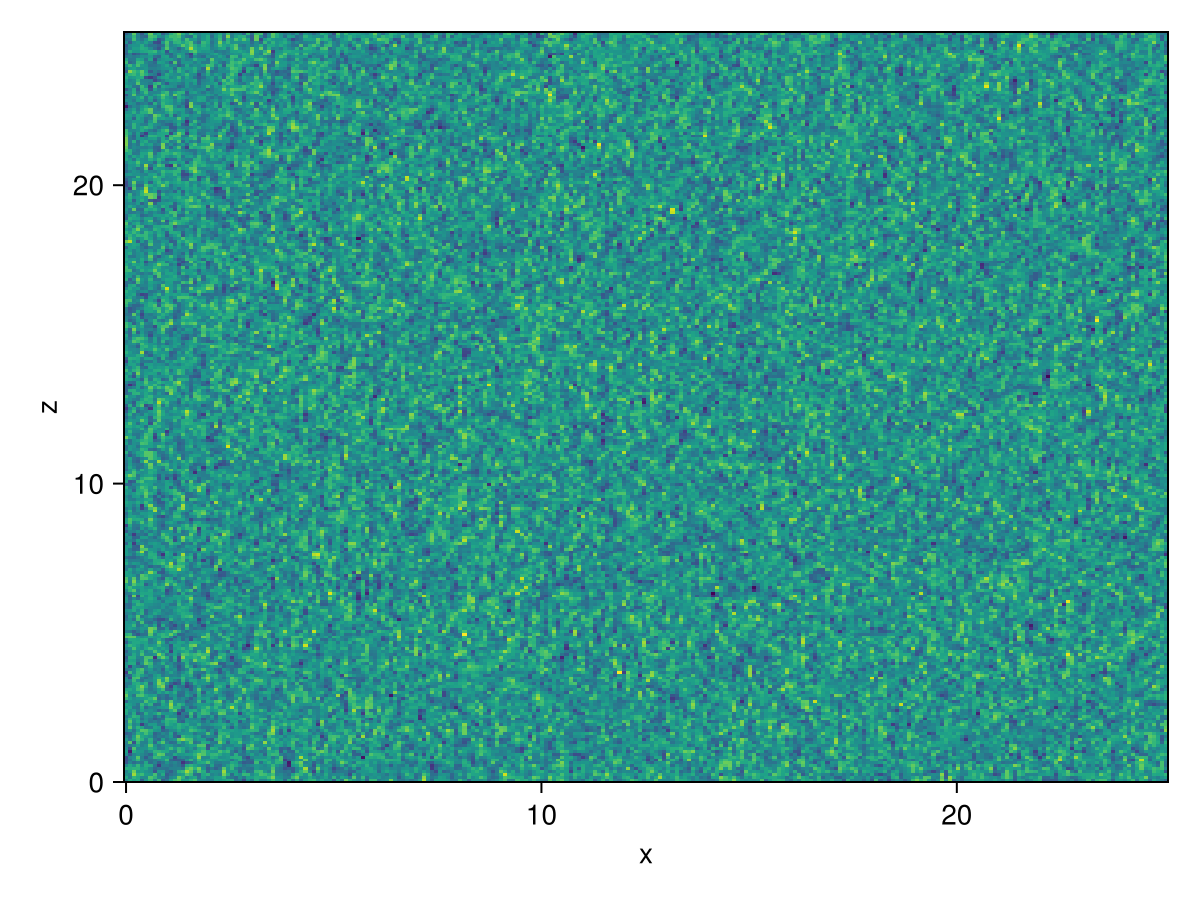

In [5]:
using CairoMakie

u, v, w = model.velocities
ζ = Field(∂x(v) - ∂y(u), indices = (:, mrgrid.Ny, :))
compute!(ζ)
heatmap(ζ)

┌ Info: Initializing simulation...
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/run.jl:205
┌ Info:     ... simulation initialization complete (183.140 ms)
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/run.jl:248
┌ Info: Executing initial time step...
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/run.jl:139
┌ Info:     ... initial time step complete (429.144 ms).
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/run.jl:168


Iteration: 0120, time: 1.200 seconds, Δt: 10 ms, max(|w|) = 5.5e-01 ms⁻¹, wall time: 1.062 seconds
Iteration: 0140, time: 1.400 seconds, Δt: 10 ms, max(|w|) = 5.2e-01 ms⁻¹, wall time: 2.167 seconds
Iteration: 0160, time: 1.600 seconds, Δt: 10 ms, max(|w|) = 4.9e-01 ms⁻¹, wall time: 3.263 seconds
Iteration: 0180, time: 1.800 seconds, Δt: 10 ms, max(|w|) = 4.4e-01 ms⁻¹, wall time: 4.362 seconds
Iteration: 0200, time: 2.000 seconds, Δt: 10 ms, max(|w|) = 4.2e-01 ms⁻¹, wall time: 5.461 seconds
Iteration: 0220, time: 2.200 seconds, Δt: 10 ms, max(|w|) = 3.8e-01 ms⁻¹, wall time: 6.561 seconds
Iteration: 0240, time: 2.400 seconds, Δt: 10 ms, max(|w|) = 3.7e-01 ms⁻¹, wall time: 7.661 seconds
Iteration: 0260, time: 2.600 seconds, Δt: 10 ms, max(|w|) = 3.6e-01 ms⁻¹, wall time: 8.761 seconds
Iteration: 0280, time: 2.800 seconds, Δt: 10 ms, max(|w|) = 3.4e-01 ms⁻¹, wall time: 9.861 seconds
Iteration: 0300, time: 3.000 seconds, Δt: 10 ms, max(|w|) = 3.4e-01 ms⁻¹, wall time: 10.962 seconds
Iteration

┌ Info: Simulation is stopping after running for 21.985 seconds.
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/simulation.jl:199
┌ Info: Model iteration 500 equals or exceeds stop iteration 500.
└ @ Oceananigans.Simulations /home/ceoas/carlipp/.julia/packages/Oceananigans/qLQaY/src/Simulations/simulation.jl:200


Iteration: 0500, time: 5.000 seconds, Δt: 10 ms, max(|w|) = 2.9e-01 ms⁻¹, wall time: 21.985 seconds


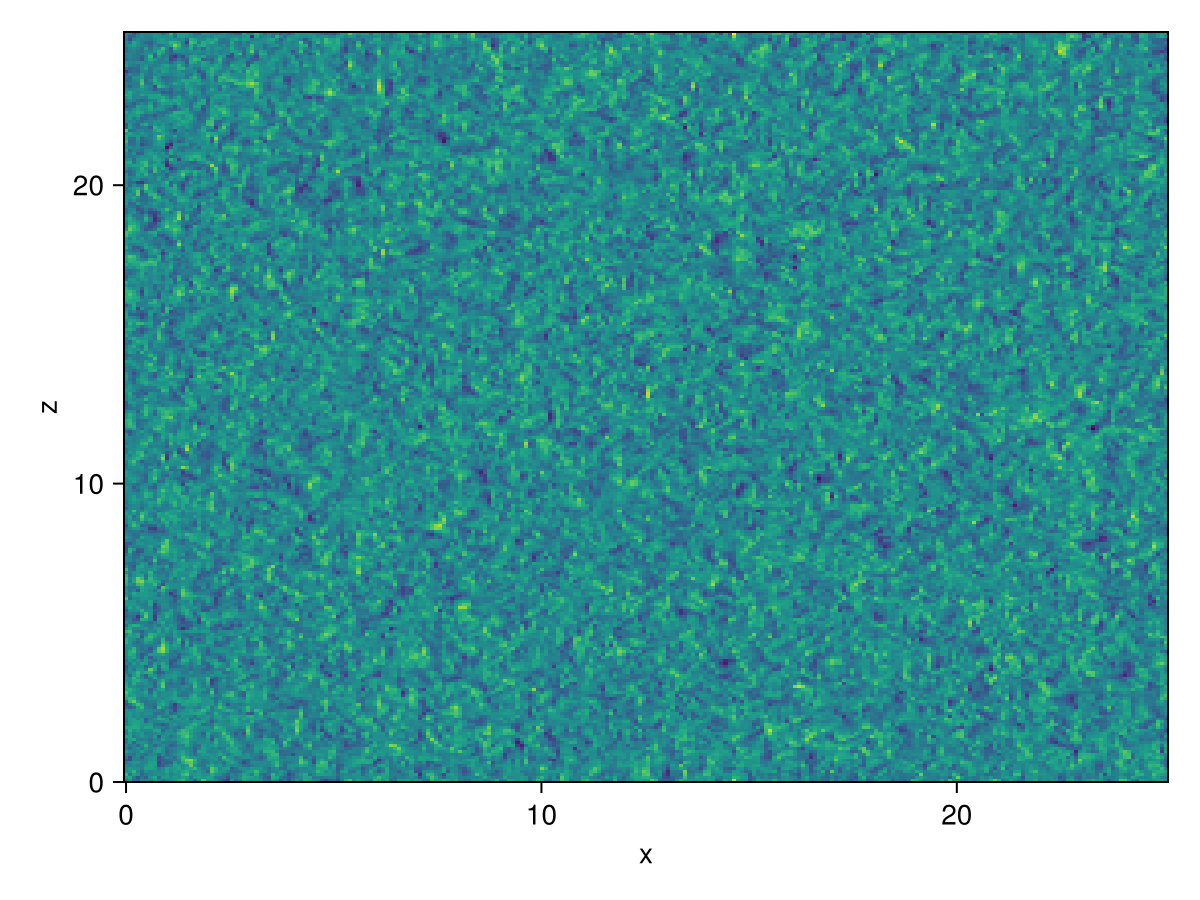

In [7]:
simulation.stop_iteration += 400
run!(simulation)

compute!(ζ)
heatmap(ζ)

